<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week15/Notebooks/EVA4_Session15_Epoch_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [0]:
!cd Dense_Depth; python train.py --epochs 12 --start-epoch 10

False
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch: [10][0/1326]	Time 21.840 (21.840)	Loss 0.4772 (0.4772)
Epoch: [10][1/1326]	Time 3.380 (25.221)	Loss 0.4123 (0.4448)
Epoch: [10][2/1326]	Time 3.400

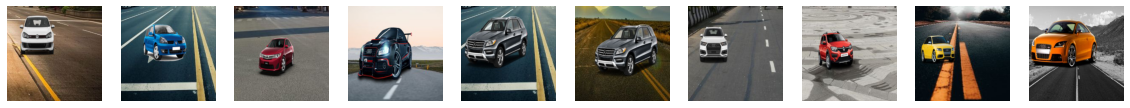

In [0]:
import pandas as pd

train_df=pd.read_csv('/content/Data/Mask_RCNN/test1.csv')
train_list=list(train_df.input_path.values)
from skimage import io
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( io.imread(train_list[i]) )
  #ax.set_title(str(f'fg_{i+1}.jpg'))
  plt.axis('off')

plt.show()

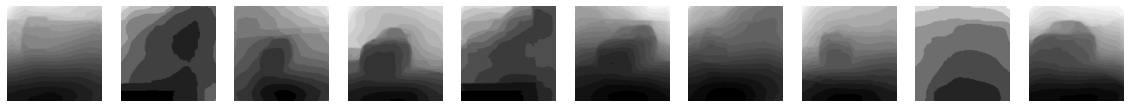

In [0]:
import pandas as pd

train_df=pd.read_csv('/content/Data/Mask_RCNN/test1.csv')
train_list=list(train_df.depth_path.values)
from skimage import io
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( io.imread(train_list[i]), cmap='gray' )
  #ax.set_title(str(f'fg_{i+1}.jpg'))
  plt.axis('off')
plt.savefig('fg.jpg')
plt.show()

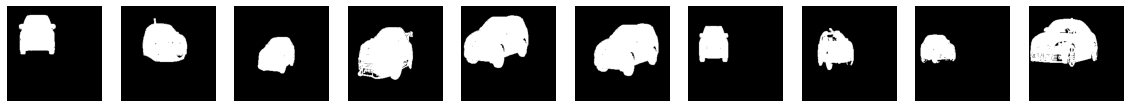

In [0]:
import pandas as pd

train_df=pd.read_csv('/content/Data/Mask_RCNN/test1.csv')
train_list=list(train_df.depth_path.values)
mask_list=[]
for item in train_list:
  new_item = item.replace("Depth_output", "fg_bg_mask")
  mask_list.append(new_item)
from skimage import io
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( io.imread(mask_list[i]), cmap='gray' )
  #ax.set_title(str(f'fg_{i+1}.jpg'))
  plt.axis('off')
plt.savefig('fg.jpg')
plt.show()

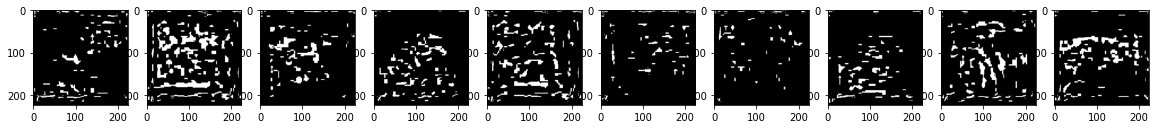

In [0]:
import os
mask_list=os.listdir('/content/drive/My Drive/output_epochs/epoch_12_224/output_mask')
mask_list.sort(key=lambda f: int(re.sub('\D', '', f)))
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  img1=cv2.imread('/content/drive/My Drive/output_epochs/epoch_12_224/output_mask/'+mask_list[i],0)
  for ii in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        img1[ii,j]=255 if img1[ii, j] >= 2 else 0
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( img1 ,cmap='gray')
plt.show()

  

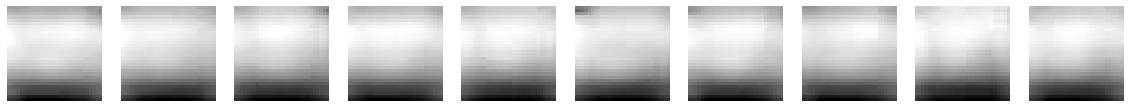

In [0]:
import os
import re
path='/content/drive/My Drive/output_epochs/epoch_12/output_depth/'
mask_list=os.listdir(path)
mask_list.sort(key=lambda f: int(re.sub('\D', '', f)))
from skimage import io
fig= plt.figure(figsize=(20, 30))
for i in range(10):
  ax=fig.add_subplot(1,10, i+1)
  ax.imshow( io.imread(path+mask_list[i]),cmap='gray' )
  #ax.set_title(str(f'fg_{i+1}.jpg'))
  plt.axis('off')

plt.show()